In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#85 age groups, 100 days, 1560 points

In [2]:
#SFNP: 1560 x 85 x 100
#MFNP: 1560 x 85 x 100

In [3]:
sfnp = np.load("/Users/amoghvp/Documents/Github/hier-neural-proc/sir_np/MA/SFNP/sfnp_results/test_seed37.npz")
print(sfnp.files, sfnp["truth"].shape, sfnp["truth"][0].shape, sfnp["truth"][0][0].shape)

['pred_mu', 'pred_cov', 'truth'] (1560, 85, 100) (85, 100) (100,)


In [4]:
mfnp = np.load("/Users/amoghvp/Documents/Github/hier-neural-proc/sir_np/MA/MFNP/mfnp_results/test_seed69.npz")
print(mfnp.files, mfnp["truth"].shape, mfnp["truth"][0].shape, mfnp["truth"][0][0].shape)

['pred_mu', 'pred_cov', 'truth'] (1560, 85, 100) (85, 100) (100,)


In [5]:
def plot_proc(proc, age, proc_type, res_type):
    plt.plot()
    plt.title(proc_type + "NP Results " + str(age))
    plt.xlabel("X axis")
    plt.ylabel("Y axis")

    
    y = [0] * 100
    for i in proc["truth"]:
        y += i[age - 1]
        
    proc_map = {"SF": ("blue", "*"), "MF": ("orange", "o"), "NARG": ("green", "diamond")}
        
    y = np.divide(y, proc["truth"].shape[0])
    x = np.array([i for i in range(1,101)])
    
    
    plt.plot(x, y, marker = proc_map[proc_type][1], color = proc_map[proc_type][0], markevery = 5, markersize = 5)
    plt.ylim(0, 10)
    plt.xlim(0, 100)
    plt.show()

In [6]:
def multi_plot(sfnp, mfnp, nargp, truth, age):
    proc_map = {"SFNP": ("blue", "*"), "MFNP": ("orange", "o"), "NARG": ("green", "diamond")}
    procs_type = ["SFNP", "MFNP"]
    procs = [sfnp, mfnp]
    res = list()
    
    for proc in range(len(procs)):    
        y = [0] * 100
        for i in procs[proc]["pred_mu"]:
            y += i[age - 1]

        y = np.divide(y, procs[proc]["pred_mu"].shape[0])
        x = np.array([i for i in range(1,101)])
        res.append(y)

        
        #plt.plot()
    plt.title("Results of Age: " + str(age))
    plt.xlabel("X axis")
    plt.ylabel("Y axis")

    plt.plot(x, res[0], marker = proc_map["SFNP"][1], color = proc_map["SFNP"][0], markevery = 5, markersize = 5)
    plt.plot(x, res[1], marker = proc_map["MFNP"][1], color = proc_map["MFNP"][0], markevery = 5, markersize = 5)
    plt.ylim(0, 10)
    plt.xlim(0, 100)
    plt.show()

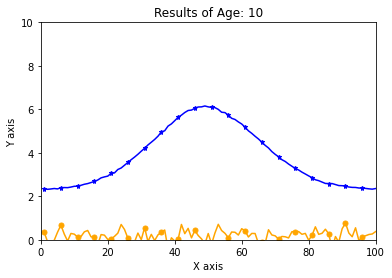

In [7]:
multi_plot(sfnp, mfnp, [], [], 10)

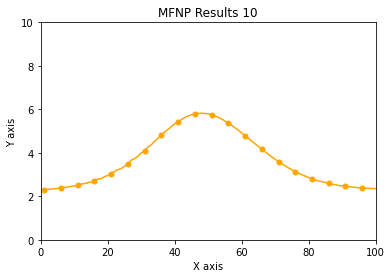

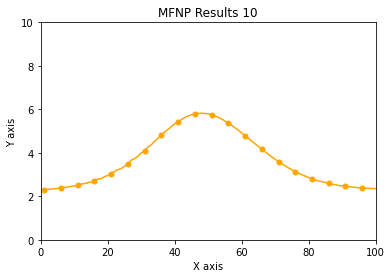

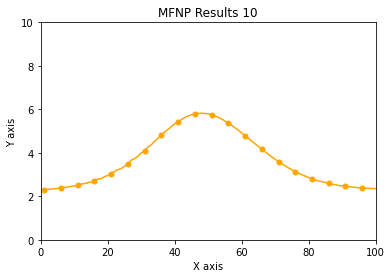

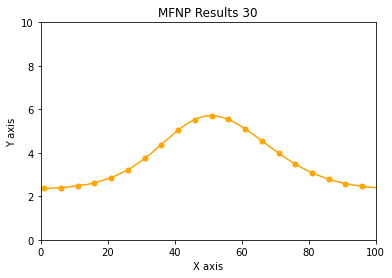

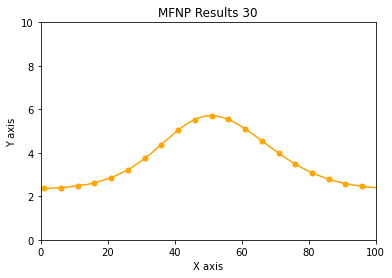

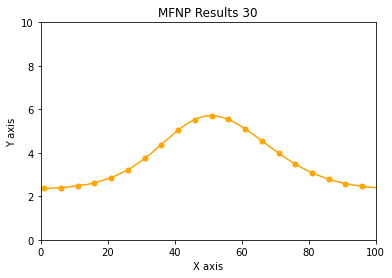

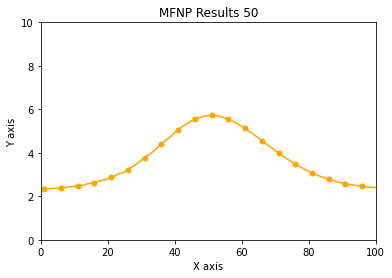

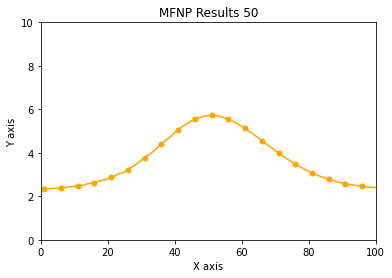

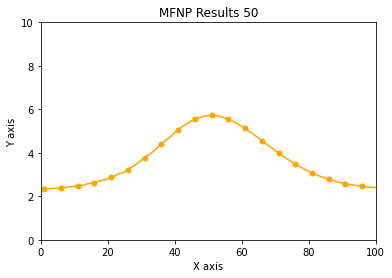

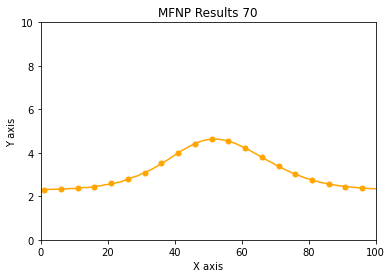

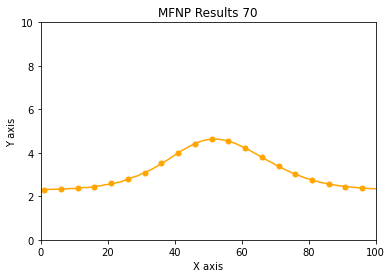

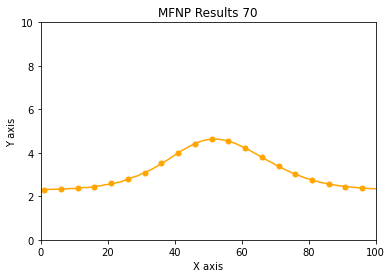

In [8]:
for i in [10, 30, 50, 70]:
    plot_proc(mfnp, i, "MF", "pred_cov")
    plot_proc(mfnp, i, "MF", "pred_mu")
    plot_proc(mfnp, i, "MF", "truth")

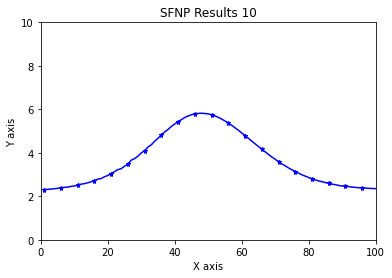

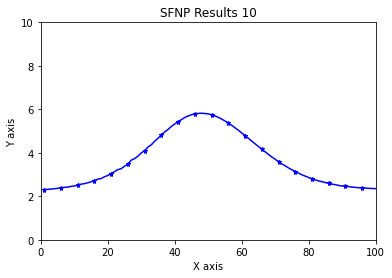

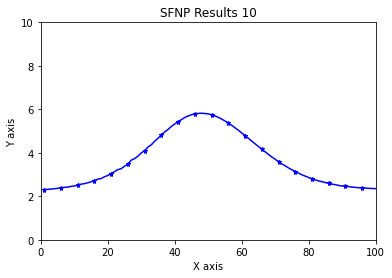

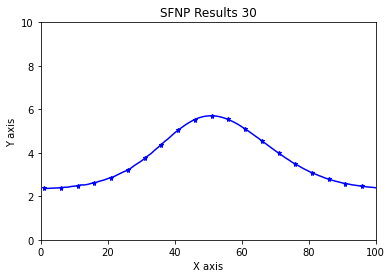

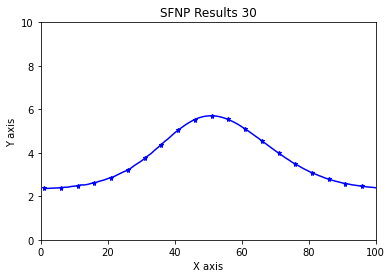

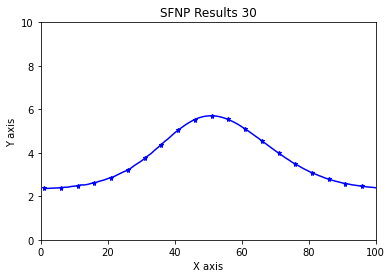

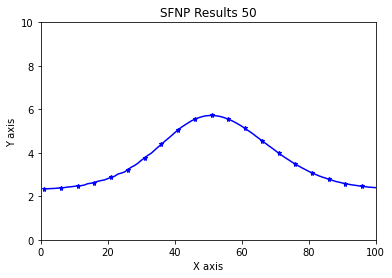

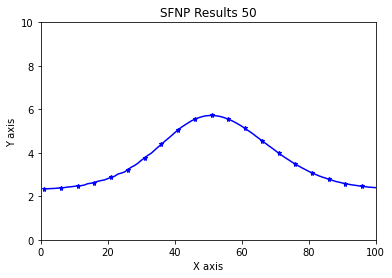

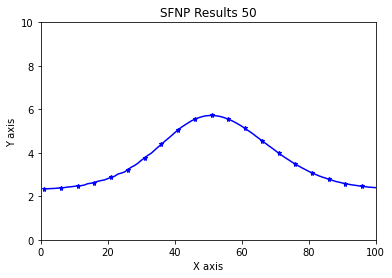

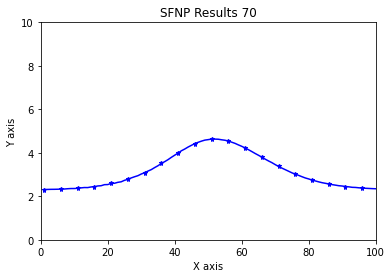

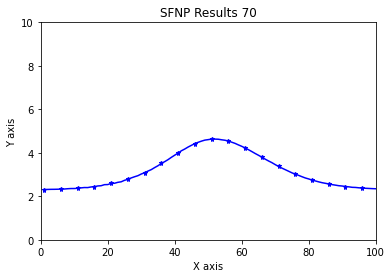

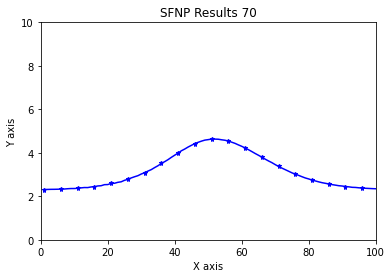

In [9]:
for i in [10, 30, 50, 70]:
    plot_proc(sfnp, i, "SF", "pred_cov")
    plot_proc(sfnp, i, "SF", "pred_mu")
    plot_proc(sfnp, i, "SF", "truth")

In [10]:
nargp = np.load("/Users/amoghvp/Documents/Github/hier-neural-proc/sir_gp/results/nargp_std.npy")
#print(nargp)
print(nargp.shape, nargp[0].shape, nargp[0][0].shape)

#mae, nll are a length 3 array
#mean and std is a 3x1560x8500 numpy array
#truth is a 1560x8500 numpy array

(3, 1560, 8500) (1560, 8500) (8500,)


In [11]:
#truth (1560x8500, 8500 condensed to 100)
nargp[0].shape
new_nargp = [0] * 100

for j in range(1560):
    for i in range(100):
        new_nargp[i] += np.average(nargp[0][j][85 * i: 85 * (i+1)])
        
    
                              
new_nargp = np.divide(new_nargp, 1560)

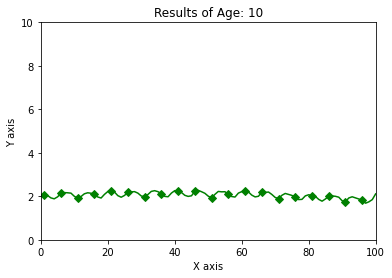

In [12]:
#age 1: 0-99, 2: 100-199, 3: 200-299, .. 9: 800-899, 10: 900-999

#age 10
age = 10

    
#y = np.divide(y, nargp[0][900:1000].shape)
x = x = np.array([i for i in range(1,101)])
proc_map = {"NARGP": ("green", "D")}

plt.plot()
plt.title("Results of Age: " + str(age))
plt.xlabel("X axis")
plt.ylabel("Y axis")

#plt.plot(x, y, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.plot(x, new_nargp, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.show()